In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df = df.drop(['ID', 'ZIP Code'], axis=1)

# 4.2 Define features and target
X = df.drop('Personal Loan', axis=1)   # independent features
y = df['Personal Loan']                 # target variable



In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Feature Scaling Completed!")



✅ Feature Scaling Completed!


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")



Training Data Shape: (3500, 11)
Testing Data Shape: (1500, 11)


In [7]:
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    print(f"\n🔹 Training SVM with {kernel.upper()} Kernel...")
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc * 100

    print(f"Accuracy ({kernel} kernel): {acc*100:.2f}%")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


🔹 Training SVM with LINEAR Kernel...
Accuracy (linear kernel): 94.93%

Confusion Matrix:
[[1334    9]
 [  67   90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.91      0.57      0.70       157

    accuracy                           0.95      1500
   macro avg       0.93      0.78      0.84      1500
weighted avg       0.95      0.95      0.94      1500


🔹 Training SVM with POLY Kernel...
Accuracy (poly kernel): 97.13%

Confusion Matrix:
[[1341    2]
 [  41  116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.98      0.74      0.84       157

    accuracy                           0.97      1500
   macro avg       0.98      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500


🔹 Training SVM with RBF Kernel...
Accuracy (rbf kernel): 97.40%

Co


📊 Accuracy Comparison (SVM Kernels):
LINEAR Kernel: 94.93%
POLY Kernel: 97.13%
RBF Kernel: 97.40%


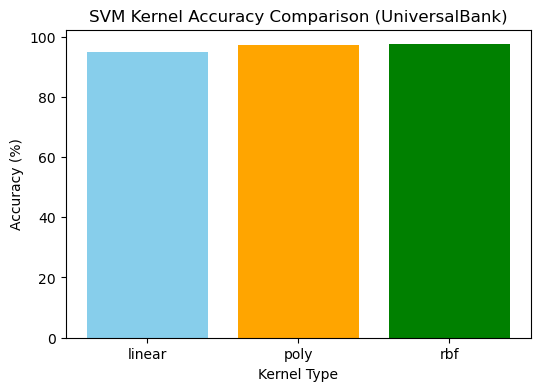

In [8]:
print("\n📊 Accuracy Comparison (SVM Kernels):")
for k, v in accuracies.items():
    print(f"{k.upper()} Kernel: {v:.2f}%")

# Visualization of accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green'])
plt.title("SVM Kernel Accuracy Comparison (UniversalBank)")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy (%)")
plt.show()

In [9]:
print("\n🔹 Test Model for a New Customer:")

# Example new customer record (same feature order)
# Age, Experience, Income, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard
sample = np.array([[37, 13, 29, 4, 0.4, 2, 155, 0, 0, 1, 0]])

# Scale new input
sample_scaled = scaler.transform(sample)

# Use RBF model (best kernel in most cases)
best_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
best_model.fit(X_train, y_train)

prediction = best_model.predict(sample_scaled)

if prediction[0] == 1:
    print("\n🟢 Predicted Result: Customer will take the Personal Loan.")
else:
    print("\n🔴 Predicted Result: Customer will NOT take the Personal Loan.")


🔹 Test Model for a New Customer:

🔴 Predicted Result: Customer will NOT take the Personal Loan.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
